Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] If you haven't completed assignment #1, please do so first.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline? 
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - _**[A Kaggle Master Explains Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)**_
  - [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) Chapter 8
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html)
  - _**[Boosting](https://www.youtube.com/watch?v=GM3CDQfQ4sw) (2.5 minute video)**_

In [1]:
import pandas as pd
df = pd.read_csv('../../../Code_Here/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')


In [2]:
df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [3]:
df['bmi'] = (df.Weight)/(df.Height)**2

In [4]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,bmi
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,0.002469
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,0.002076
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,0.002396


In [5]:
df = df.dropna()

In [6]:
df['Sport'].value_counts(normalize = True)

Athletics                    0.120871
Swimming                     0.082370
Rowing                       0.069713
Ice Hockey                   0.043107
Hockey                       0.038700
Gymnastics                   0.038468
Fencing                      0.036745
Football                     0.035917
Canoeing                     0.034492
Basketball                   0.033133
Wrestling                    0.032040
Volleyball                   0.031742
Handball                     0.031046
Cycling                      0.027998
Water Polo                   0.025314
Boxing                       0.023458
Cross Country Skiing         0.022763
Sailing                      0.022431
Equestrianism                0.021967
Shooting                     0.017958
Weightlifting                0.017627
Judo                         0.017428
Speed Skating                0.016169
Biathlon                     0.012856
Alpine Skiing                0.011729
Baseball                     0.011033
Diving      

In [7]:
df = df[~df['Sport'].isin(['Freestyle Skiing', 'Rhythmic Gymnastics',"Snowboarding","Rugby Sevens",
                           "Beach Volleyball","Rugby","Triathlon",
                           "Trampolining","Skeleton","Tug-Of-War" ,"Golf",
                           "Art Competitions", "Lacrosse"])]

In [8]:
df['Sport'].value_counts(normalize = True)

Athletics                    0.123264
Swimming                     0.084001
Rowing                       0.071093
Ice Hockey                   0.043960
Hockey                       0.039466
Gymnastics                   0.039230
Fencing                      0.037473
Football                     0.036628
Canoeing                     0.035175
Basketball                   0.033789
Wrestling                    0.032674
Volleyball                   0.032370
Handball                     0.031661
Cycling                      0.028552
Water Polo                   0.025815
Boxing                       0.023923
Cross Country Skiing         0.023213
Sailing                      0.022875
Equestrianism                0.022402
Shooting                     0.018314
Weightlifting                0.017976
Judo                         0.017773
Speed Skating                0.016489
Biathlon                     0.013110
Alpine Skiing                0.011961
Baseball                     0.011252
Diving      

In [9]:
df.select_dtypes(exclude='number').nunique()

Name      20232
Sex           2
Team        253
NOC         142
Games        51
Season        2
City         42
Sport        42
Event       521
Medal         3
dtype: int64

In [10]:
#Split the data into train/test randomly
from sklearn.model_selection import train_test_split

df.drop(columns= ['ID', 'Event', 'NOC', 'Name','Games', 'City'], inplace=True)

train, test = train_test_split(df, test_size = 0.2, random_state=42)
print(train.shape, test.shape)

(23676, 10) (5919, 10)


In [11]:
# Split train into train & val

train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              random_state=42)
train.shape, val.shape, test.shape

((18940, 10), (4736, 10), (5919, 10))

In [12]:
# Arrange data into X features matrix and y target vector 
target = "Sport"
X_train = train.drop(columns= [target])

y_train = train[target]
X_val = val.drop(columns= [target])
y_val = val[target]
X_test = test

print(X_train.shape, X_val.shape)

(18940, 9) (4736, 9)


In [13]:
import category_encoders as ce  # !pip install category_encoders==2.*
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [14]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(n_jobs=-1, random_state=42)
)

# Fit on train and score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy:', pipeline.score(X_val, y_val))

/Users/amybeisel/opt/anaconda3/envs/AmysSpecial/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Validation Accuracy: 0.5249155405405406


In [15]:
transformers = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.fit_transform(X_val) 

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [16]:
import numpy as np
import eli5 # !pip install eli5
from eli5.sklearn import PermutationImportance


#1. Calculate permutation importances
permuter = PermutationImportance(
    model, 
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                                                     

In [17]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

Team      0.207095
bmi       0.178970
Height    0.162078
Year      0.159248
Season    0.158868
Sex       0.151225
Age       0.095101
Weight    0.070439
Medal     0.017103
dtype: float64

In [18]:
eli5.show_weights(
    permuter,
    top=None, #Shows all features
    feature_names=feature_names
)

Weight,Feature
0.2071 ± 0.0044,Team
0.1790 ± 0.0051,bmi
0.1621 ± 0.0099,Height
0.1592 ± 0.0071,Year
0.1589 ± 0.0088,Season
0.1512 ± 0.0095,Sex
0.0951 ± 0.0088,Age
0.0704 ± 0.0062,Weight
0.0171 ± 0.0032,Medal


In [19]:
minimum_importance = 0 

mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask] # Subsetting with just the important features
X_train = X_train[features]

In [20]:
X_val = X_val[features]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
score_with = pipeline.score(X_val, y_val)
print(f'Validation Accuracy: {score_with}')

Validation Accuracy: 0.5764358108108109


In [21]:
from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Sex', 'Team', 'Season', 'Medal'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'Sex', 'data_type': dtype('O'),
                                          'mapping': M      1
F      2
NaN   -2
dtype: int64},
                                         {'col': 'Team',
                                          'data_type': dtype('O'),
                                          'mapping': Unified Team      1
Germany           2
Japan             3
Soviet Union      4
China             5
               ... 
Jest            232
Nirefs          2...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
      

In [22]:
from sklearn.metrics import accuracy_score

y_pred = pipeline.predict(X_val)
print('Validation Accuracy', accuracy_score(y_val, y_pred))

Validation Accuracy 0.4752956081081081


In [23]:
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

model = XGBClassifier(
    n_estimators=1000, # <= [up to] 1000 trees (but depends on early stopping)
    max_depth = 7, # Deeper Trees for high cardinality categories
    learning_rate = 0.5, 
    n_jobs=-1,
)

eval_set = [(X_train_encoded, y_train),
            (X_val_encoded, y_val)]

model.fit(X_train_encoded, y_train,
          eval_set=eval_set,
          eval_metric='merror',
          early_stopping_rounds=50 ) # Stop if the score hasn't imporved in the last 50 rounds)

[0]	validation_0-merror:0.537751	validation_1-merror:0.600084
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 50 rounds.
[1]	validation_0-merror:0.505597	validation_1-merror:0.581081
[2]	validation_0-merror:0.446727	validation_1-merror:0.537373
[3]	validation_0-merror:0.415945	validation_1-merror:0.518159
[4]	validation_0-merror:0.390496	validation_1-merror:0.505279
[5]	validation_0-merror:0.371859	validation_1-merror:0.493454
[6]	validation_0-merror:0.352957	validation_1-merror:0.485008
[7]	validation_0-merror:0.337804	validation_1-merror:0.477407
[8]	validation_0-merror:0.321542	validation_1-merror:0.467694
[9]	validation_0-merror:0.307445	validation_1-merror:0.460938
[10]	validation_0-merror:0.29641	validation_1-merror:0.456926
[11]	validation_0-merror:0.281309	validation_1-merror:0.44848
[12]	validation_0-merror:0.265417	validation_1-merror:0.444257
[13]	validation_0-merror:0.253

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

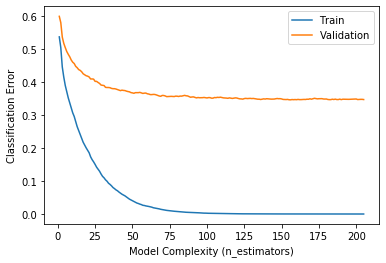

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

results = model.evals_result()
train_error = results['validation_0']['merror']
val_error = results['validation_1']['merror']
epoch = range(1, len(train_error)+1)
plt.plot(epoch, train_error, label="Train")
plt.plot(epoch, val_error, label="Validation")
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
#plt.ylim((1, .1)) #Turn this on and off to see the full plt 
plt.legend();